In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [29]:
# Load the CSV file
file_path = "/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/THINGS/crossval_optimized_things_cba_embedding.csv"  
df = pd.read_csv(file_path)

# Sort the DataFrame by the 'image' column
df_sorted = df.sort_values(by='image', key=lambda col: col.str.lower())  # Case-insensitive sort

# Save the sorted DataFrame back to a CSV file
output_path = "/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/THINGS/crossval_optimized_things_cba_embedding.csv"  # Replace with your output file path
df_sorted.to_csv(output_path, index=False)

print(f"Sorted CSV saved to {output_path}")

Sorted CSV saved to /home/wallacelab/complexity-final/Embeddings/CLIP-CBA/THINGS/crossval_optimized_things_cba_embedding.csv


In [68]:
# embedding_path = "./Data/hebart49_scaled_embedding_weighted_entropy_scores.csv"
# embedding_path = "./Data/things_hba_weighted_entropy_scores.csv"
embedding_path = "/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/THINGS/crossval_optimized_scaled_things_hba_embedding.csv"
hdf5_file = '/home/wallacelab/complexity-final/Optimizations/Neural/output/things_crossval_scaled_optimized_hba_rdm.hdf5'

In [69]:
df = pd.read_csv(embedding_path)
df

image    0         1         2    3    4         5  \
0            aardvark_01b.jpg  0.0  0.007471  0.071099  0.0  0.0  0.000927   
1              abacus_01b.jpg  0.0  0.014951  0.005845  0.0  0.0  0.001596   
2           accordion_01b.jpg  0.0  0.012381  0.013445  0.0  0.0  0.002274   
3               acorn_01b.jpg  0.0  0.071099  0.048809  0.0  0.0  0.013989   
4     air_conditioner_01b.jpg  0.0  0.006779  0.000000  0.0  0.0  0.002596   
...                       ...  ...       ...       ...  ...  ...       ...   
1849             yoke_01s.jpg  0.0  0.008569  0.016240  0.0  0.0  0.002635   
1850             yolk_01b.jpg  0.0  0.071099  0.013880  0.0  0.0  0.003142   
1851            zebra_01b.jpg  0.0  0.000000  0.071099  0.0  0.0  0.001424   
1852           zipper_01b.jpg  0.0  0.002729  0.003324  0.0  0.0  0.000858   
1853         zucchini_01b.jpg  0.0  0.071099  0.019736  0.0  0.0  0.014587   

        6         7         8  ...        40   41        42        43  \
0     0.0  0.003311  0.001101  ...  0.000997  0.0  0.000583  0.001066   
1     0.0  0.006686  0.008416  ...  0.002600  0.0  0.001428  0.004319   
2     0.0  0.014612  0.003635  ...  0.005926  0.0  0.003164  0.002951   
3     0.0  0.006378  0.010618  ...  0.004941  0.0  0.002749  0.002615   
4     0.0  0.016742  0.002695  ...  0.005768  0.0  0.001846  0.003032   
...   ...       ...       ...  ...       ...  ...       ...       ...   
1849  0.0  0.010086  0.013144  ...  0.006158  0.0  0.003441  0.005996   
1850  0.0  0.003471  0.001299  ...  0.001391  0.0  0.000910  0.001522   
1851  0.0  0.007420  0.000906  ...  0.003021  0.0  0.001328  0.001549   
1852  0.0  0.006333  0.000980  ...  0.002980  0.0  0.001448  0.003734   
1853  0.0  0.001114  0.000489  ...  0.001702  0.0  0.000246  0.001294   

            44   45   46        47   48  Predicted Complexity Score  
0     0.004511  0.0  0.0  0.000547  0.0                    0.119096  
1     0.003260  0.0  0.0  0.003243  0.0                    0.204042  
2     0.009413  0.0  0.0  0.005487  0.0                    0.193715  
3     0.008563  0.0  0.0  0.005957  0.0                    0.325647  
4     0.011387  0.0  0.0  0.004140  0.0                    0.203552  
...        ...  ...  ...       ...  ...                         ...  
1849  0.003997  0.0  0.0  0.003513  0.0                    0.144335  
1850  0.003960  0.0  0.0  0.001498  0.0                    0.167552  
1851  0.004115  0.0  0.0  0.001920  0.0                    0.128227  
1852  0.002928  0.0  0.0  0.003035  0.0                    0.107612  
1853  0.005070  0.0  0.0  0.000000  0.0                    0.165280  

[1854 rows x 51 columns]

In [70]:
embedding = df.iloc[:, 1:].values
embedding.shape

(1854, 50)

In [71]:
predict_complexity_score = np.sum(embedding, axis=1)
predict_complexity_score.shape

(1854,)

In [72]:
import numpy as np
from scipy.spatial import distance_matrix

reshaped_array = predict_complexity_score.reshape(-1, 1)

rdm = distance_matrix(reshaped_array, reshaped_array)

# rdm = 1 - np.corrcoef(predict_complexity_score)

# Verify the shape of the RDM
print(rdm.shape)  # Should print (1854, 1854)

(1854, 1854)


In [73]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Compute the pairwise Euclidean distances
# rdm = squareform(pdist(predict_complexity_score, metric='euclidean'))

# rdm = 1 - np.corrcoef(predict_complexity_score)

# Verify the shape of the RDM
print(rdm.shape)  # Should print (1854, 1854)


(1854, 1854)


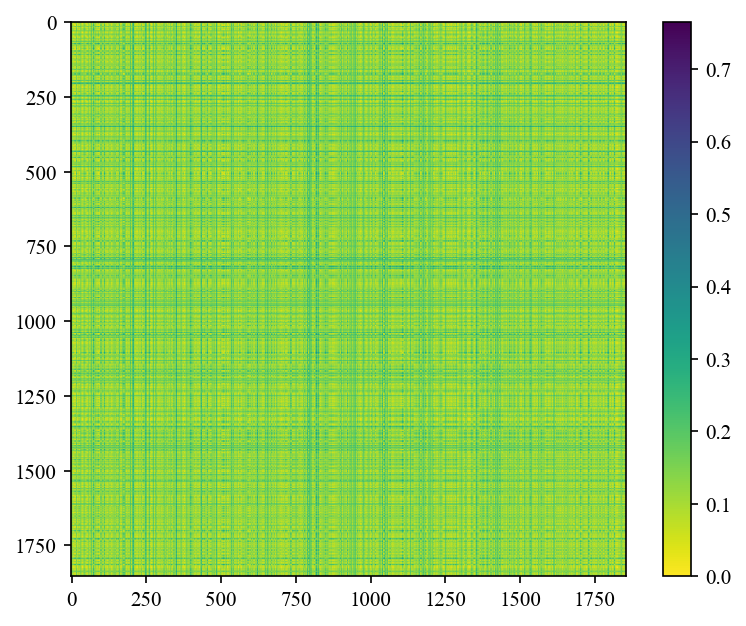

(-0.5, 1853.5, 1853.5, -0.5)

In [74]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=150)  # Create a new figure and axes with 150 dpi resolution
fig.patch.set_facecolor('none')  # Set the figure facecolor to none
ax.set_facecolor('none')  # Set the axes facecolor to none

plt.imshow(rdm, cmap='viridis_r')  # Display the image
plt.colorbar()
plt.show()
ax.axis('off')  # Remove the x and y axis labels


In [75]:
# export rdm to hdf5
import h5py
with h5py.File(hdf5_file, 'w') as f:
    # Create a dataset and write the rdm array
    f.create_dataset('rdm', data=rdm)


loading Things MEG RDM
loading Complexity RDMs
processing Complexity model correlation
processing Permuted Complexity model correlation
performing Wilcoxon signed rank test
plotting


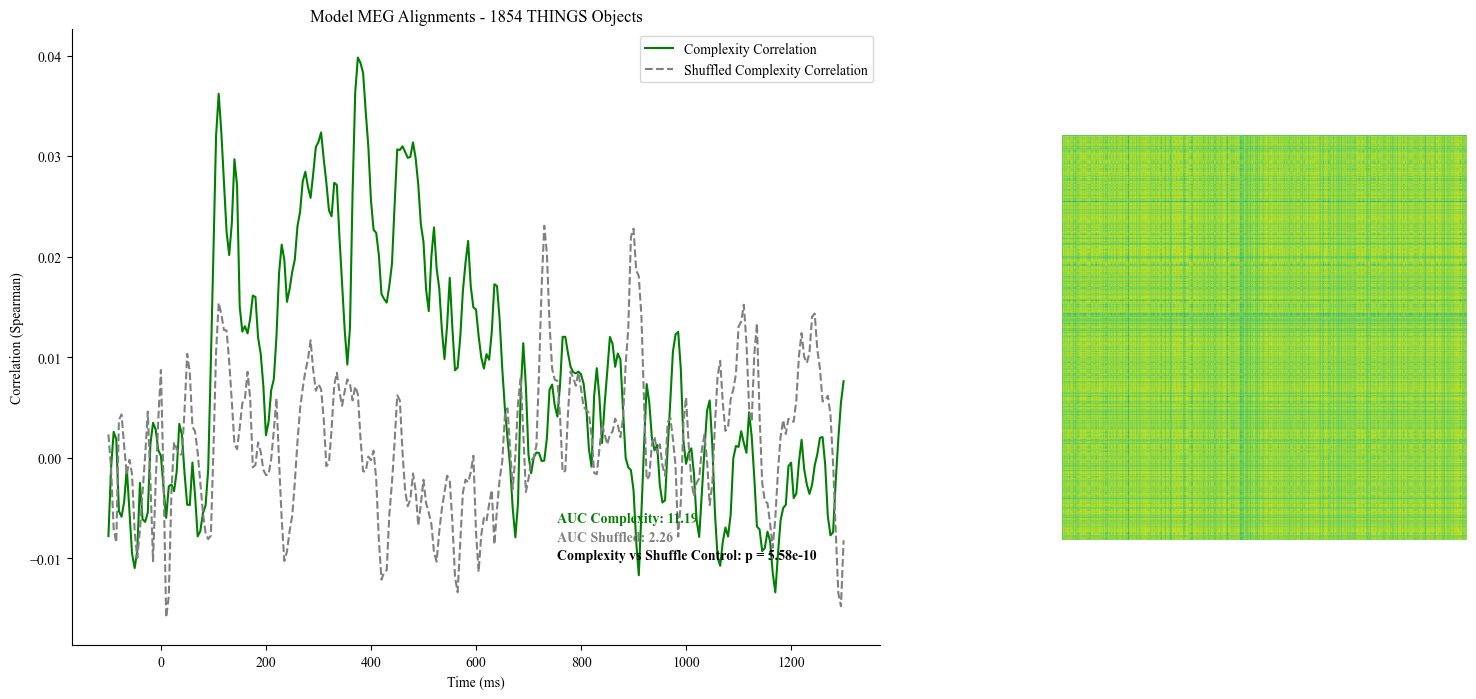

In [47]:
import h5py
import numpy as np
from scipy.stats import spearmanr, wilcoxon
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm import tqdm
import os
from numpy import trapz

plt.rcParams['font.family'] = 'Times New Roman'

def compute_group_mean_rdm(exclude_index):
    group_rdms = np.delete(all_rdms, exclude_index, axis=0)
    mean_rdms = np.mean(group_rdms, axis=0)
    return mean_rdms

def calculate_model_correlation(group_mean_rdms, model_rdm_flat):
    model_correlations = []
    for time_point in range(group_mean_rdms.shape[0]):
        indices = np.triu_indices_from(group_mean_rdms[time_point], k=1)
        group_mean_rdm_flat = group_mean_rdms[time_point][indices]
        corr, _ = spearmanr(model_rdm_flat, group_mean_rdm_flat, nan_policy='omit')
        model_correlations.append(corr)
    return model_correlations

def permute_rdm(rdm):
    permutation = np.random.permutation(rdm.shape[0])
    permuted_rdm = rdm[permutation][:, permutation]
    return permuted_rdm

def calculate_permuted_correlations(model_rdm, group_mean_rdms, num_permutations):
    permuted_correlations = []
    for _ in range(num_permutations):
        permuted_model_rdm = permute_rdm(model_rdm)
        indices = np.triu_indices_from(permuted_model_rdm, k=1)
        permuted_model_rdm_flat = permuted_model_rdm[indices]
        model_correlations = calculate_model_correlation(group_mean_rdms, permuted_model_rdm_flat)
        permuted_correlations.append(model_correlations)
    return np.array(permuted_correlations)

def permutation_testing(args):
    model_rdm, group_mean_rdms, num_permutations = args
    return calculate_permuted_correlations(model_rdm, group_mean_rdms, num_permutations)

def load_dynamic_rdms(dynamic_rdm_dir):
    dynamic_rdms = {}
    for rdm_file in sorted(os.listdir(dynamic_rdm_dir)):
        if rdm_file.endswith('.hdf5'):
            time_ms = int(rdm_file.split('_')[-1][:-7])  # Extract time in ms from filename
            with h5py.File(os.path.join(dynamic_rdm_dir, rdm_file), 'r') as f:
                dynamic_rdms[time_ms] = f['rdm'][:]
    return dynamic_rdms

def fdr_correction(p_values, alpha=0.05):
    p_values_sorted = np.sort(p_values)
    p_values_indices = np.argsort(p_values)
    n = len(p_values)
    fdr_threshold = np.arange(1, n+1) * (alpha / n)
    below_threshold = p_values_sorted <= fdr_threshold
    max_below = np.max(np.where(below_threshold)[0]) if np.any(below_threshold) else -1
    corrected_threshold = p_values_sorted[max_below] if max_below >= 0 else 0
    return p_values <= corrected_threshold

def flatten_upper_triangles(rdms):
    if rdms.ndim == 3:

        # Get the upper triangle indices for one matrix (all matrices have the same shape)
        triu_indices = np.triu_indices_from(rdms[0], k=1)
        
        # Flatten the upper triangles of all matrices
        flattened_rdms = np.array([matrix[triu_indices] for matrix in rdms])

        return flattened_rdms
    elif rdms.ndim == 2:
        triu_indices = np.triu_indices_from(rdms, k=1)
        return rdms[triu_indices]

def calculate_individual_correlation(model_rdms, p_rdms):
    model_correlations = []
    print(model_rdms.shape)
    print(p_rdms.shape)

    for i in range(281):
        model_rdm_flat = flatten_upper_triangles(model_rdms)
        p_rdm_flat = flatten_upper_triangles(p_rdms[i])
        corr, _ = spearmanr(model_rdm_flat, p_rdm_flat, nan_policy='omit')
        model_correlations.append(corr)
    print(model_correlations)

    return model_correlations


if __name__ == '__main__':
    # Ensure the figures directory exists
    figures_dir = './figures'
    if not os.path.exists(figures_dir):
        os.makedirs(figures_dir)

    # Load the .mat file
    meg_rdm = "/home/wallacelab/complexity-final/Optimizations/Neural/MEG/ThingsMEG_RDMs/ThingsMEG_RDM_4P.npy"
    print("loading Things MEG RDM")
    all_rdms = np.load(meg_rdm, allow_pickle=True)

    # Paths for model RDMs
    x_rdm_path = '/home/wallacelab/complexity-final/Optimizations/Neural/output/things_crossval2_optimized_cba_rdm.hdf5'

    # Load the models' RDMs
    print("loading Complexity RDMs")
    with h5py.File(x_rdm_path, 'r') as f:
        x_rdm = f['rdm'][:]
        indices = np.triu_indices_from(x_rdm, k=1)
        x_rdm_flat = x_rdm[indices]

    # Create a permuted (shuffled) version of x_rdm
    x_rdm_permuted = permute_rdm(x_rdm)
    x_rdm_permuted_flat = x_rdm_permuted[indices]

    overall_group_mean_rdms = np.mean(all_rdms, axis=0) # Compute group mean RDMs including all subjects
    print("processing Complexity model correlation")
    x_correlations = calculate_model_correlation(overall_group_mean_rdms, x_rdm_flat)

    print("processing Permuted Complexity model correlation")
    x_permuted_correlations = calculate_model_correlation(overall_group_mean_rdms, x_rdm_permuted_flat)
    

    # Time points for plotting
    time_points = np.linspace(-100, 1300, 281)

    # Perform signed rank Wilcoxon test for each time point
    print("performing Wilcoxon signed rank test")
    p = wilcoxon(x_correlations, x_permuted_correlations).pvalue

    print("plotting")
    # Plotting
    # Create a figure with a grid layout
    fig = plt.figure(figsize=(18, 8))
    plt.rcParams['font.family'] = 'Times New Roman'  # Set font to Times New Roman
    gs = fig.add_gridspec(1, 2, width_ratios=[2, 1], wspace=0.3)

    # Plot 1: Correlation plots
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(time_points, x_correlations, label='Complexity Correlation', color='green')
    ax1.plot(time_points, x_permuted_correlations, label='Shuffled Complexity Correlation', color='grey', linestyle='--')

    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Correlation (Spearman)')
    ax1.set_title('Model MEG Alignments - 1854 THINGS Objects')
    ax1.legend()

    # Remove top and right frame
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Calculate AUC for each correlation curve
    auc_x = trapz(x_correlations, dx=np.diff(time_points)[0])
    auc_x_permuted = trapz(x_permuted_correlations, dx=np.diff(time_points)[0])

    # Annotate AUC values
    plt.annotate(f'AUC Complexity: {auc_x:.2f}', xy=(0.6, 0.20), xycoords='axes fraction', color='green', size=10, weight='bold')
    plt.annotate(f'AUC Shuffled: {auc_x_permuted:.2f}', xy=(0.6, 0.17), xycoords='axes fraction', color='grey', size=10, weight='bold')
    plt.annotate(f'Complexity vs Shuffle Control: p = {p:.2e}', xy=(0.6, 0.14), xycoords='axes fraction', color='black', size=10, weight='bold')

    # Plot 2: RDM plot
    ax2 = fig.add_subplot(gs[0, 1])
    fig.patch.set_facecolor('none')  # Set the figure facecolor to none
    ax2.set_facecolor('none')  # Set the axes facecolor to none

    im = ax2.imshow(rdm, cmap='viridis_r')  # Display the image

    ax2.axis('off')  # Remove the x and y axis labels

    plt.show()


loading Things MEG RDM
loading Complexity RDMs
processing Complexity model correlation
processing Permuted Complexity model correlation
performing Wilcoxon signed rank test
plotting


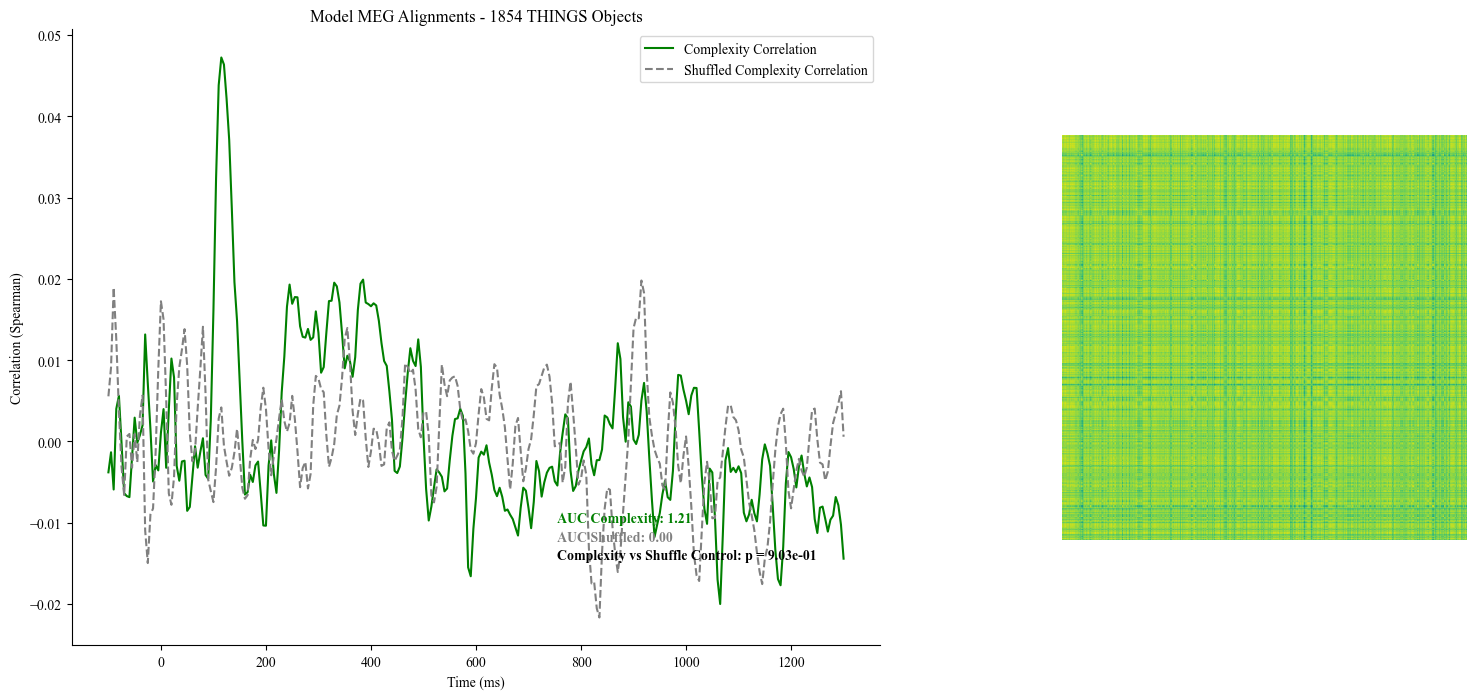

In [24]:
import h5py
import numpy as np
from scipy.stats import spearmanr, wilcoxon
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm import tqdm
import os
from numpy import trapz

plt.rcParams['font.family'] = 'Times New Roman'

def compute_group_mean_rdm(exclude_index):
    group_rdms = np.delete(all_rdms, exclude_index, axis=0)
    mean_rdms = np.mean(group_rdms, axis=0)
    return mean_rdms

def calculate_model_correlation(group_mean_rdms, model_rdm_flat):
    model_correlations = []
    for time_point in range(group_mean_rdms.shape[0]):
        indices = np.triu_indices_from(group_mean_rdms[time_point], k=1)
        group_mean_rdm_flat = group_mean_rdms[time_point][indices]
        corr, _ = spearmanr(model_rdm_flat, group_mean_rdm_flat, nan_policy='omit')
        model_correlations.append(corr)
    return model_correlations

def permute_rdm(rdm):
    permutation = np.random.permutation(rdm.shape[0])
    permuted_rdm = rdm[permutation][:, permutation]
    return permuted_rdm

def calculate_permuted_correlations(model_rdm, group_mean_rdms, num_permutations):
    permuted_correlations = []
    for _ in range(num_permutations):
        permuted_model_rdm = permute_rdm(model_rdm)
        indices = np.triu_indices_from(permuted_model_rdm, k=1)
        permuted_model_rdm_flat = permuted_model_rdm[indices]
        model_correlations = calculate_model_correlation(group_mean_rdms, permuted_model_rdm_flat)
        permuted_correlations.append(model_correlations)
    return np.array(permuted_correlations)

def permutation_testing(args):
    model_rdm, group_mean_rdms, num_permutations = args
    return calculate_permuted_correlations(model_rdm, group_mean_rdms, num_permutations)

def load_dynamic_rdms(dynamic_rdm_dir):
    dynamic_rdms = {}
    for rdm_file in sorted(os.listdir(dynamic_rdm_dir)):
        if rdm_file.endswith('.hdf5'):
            time_ms = int(rdm_file.split('_')[-1][:-7])  # Extract time in ms from filename
            with h5py.File(os.path.join(dynamic_rdm_dir, rdm_file), 'r') as f:
                dynamic_rdms[time_ms] = f['rdm'][:]
    return dynamic_rdms

def fdr_correction(p_values, alpha=0.05):
    p_values_sorted = np.sort(p_values)
    p_values_indices = np.argsort(p_values)
    n = len(p_values)
    fdr_threshold = np.arange(1, n+1) * (alpha / n)
    below_threshold = p_values_sorted <= fdr_threshold
    max_below = np.max(np.where(below_threshold)[0]) if np.any(below_threshold) else -1
    corrected_threshold = p_values_sorted[max_below] if max_below >= 0 else 0
    return p_values <= corrected_threshold

def flatten_upper_triangles(rdms):
    if rdms.ndim == 3:

        # Get the upper triangle indices for one matrix (all matrices have the same shape)
        triu_indices = np.triu_indices_from(rdms[0], k=1)
        
        # Flatten the upper triangles of all matrices
        flattened_rdms = np.array([matrix[triu_indices] for matrix in rdms])

        return flattened_rdms
    elif rdms.ndim == 2:
        triu_indices = np.triu_indices_from(rdms, k=1)
        return rdms[triu_indices]

def calculate_individual_correlation(model_rdms, p_rdms):
    model_correlations = []
    print(model_rdms.shape)
    print(p_rdms.shape)

    for i in range(281):
        model_rdm_flat = flatten_upper_triangles(model_rdms)
        p_rdm_flat = flatten_upper_triangles(p_rdms[i])
        corr, _ = spearmanr(model_rdm_flat, p_rdm_flat, nan_policy='omit')
        model_correlations.append(corr)
    print(model_correlations)

    return model_correlations


if __name__ == '__main__':
    # Ensure the figures directory exists
    figures_dir = './figures'
    if not os.path.exists(figures_dir):
        os.makedirs(figures_dir)

    # Load the .mat file
    meg_rdm = "/home/wallacelab/complexity-final/Optimizations/Neural/MEG/ThingsMEG_RDMs/ThingsMEG_RDM_4P.npy"
    print("loading Things MEG RDM")
    all_rdms = np.load(meg_rdm, allow_pickle=True)

    # Paths for model RDMs
    x_rdm_path = hdf5_file

    # Load the models' RDMs
    print("loading Complexity RDMs")
    with h5py.File(x_rdm_path, 'r') as f:
        x_rdm = f['rdm'][:]
        indices = np.triu_indices_from(x_rdm, k=1)
        x_rdm_flat = x_rdm[indices]

    # Create a permuted (shuffled) version of x_rdm
    x_rdm_permuted = permute_rdm(x_rdm)
    x_rdm_permuted_flat = x_rdm_permuted[indices]

    overall_group_mean_rdms = np.mean(all_rdms, axis=0) # Compute group mean RDMs including all subjects
    print("processing Complexity model correlation")
    x_correlations = calculate_model_correlation(overall_group_mean_rdms, x_rdm_flat)

    print("processing Permuted Complexity model correlation")
    x_permuted_correlations = calculate_model_correlation(overall_group_mean_rdms, x_rdm_permuted_flat)
    

    # Time points for plotting
    time_points = np.linspace(-100, 1300, 281)

    # Perform signed rank Wilcoxon test for each time point
    print("performing Wilcoxon signed rank test")
    p = wilcoxon(x_correlations, x_permuted_correlations).pvalue

    print("plotting")
    # Plotting
    # Create a figure with a grid layout
    fig = plt.figure(figsize=(18, 8))
    plt.rcParams['font.family'] = 'Times New Roman'  # Set font to Times New Roman
    gs = fig.add_gridspec(1, 2, width_ratios=[2, 1], wspace=0.3)

    # Plot 1: Correlation plots
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(time_points, x_correlations, label='Complexity Correlation', color='green')
    ax1.plot(time_points, x_permuted_correlations, label='Shuffled Complexity Correlation', color='grey', linestyle='--')

    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Correlation (Spearman)')
    ax1.set_title('Model MEG Alignments - 1854 THINGS Objects')
    ax1.legend()

    # Remove top and right frame
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Calculate AUC for each correlation curve
    auc_x = trapz(x_correlations, dx=np.diff(time_points)[0])
    auc_x_permuted = trapz(x_permuted_correlations, dx=np.diff(time_points)[0])

    # Annotate AUC values
    plt.annotate(f'AUC Complexity: {auc_x:.2f}', xy=(0.6, 0.20), xycoords='axes fraction', color='green', size=10, weight='bold')
    plt.annotate(f'AUC Shuffled: {auc_x_permuted:.2f}', xy=(0.6, 0.17), xycoords='axes fraction', color='grey', size=10, weight='bold')
    plt.annotate(f'Complexity vs Shuffle Control: p = {p:.2e}', xy=(0.6, 0.14), xycoords='axes fraction', color='black', size=10, weight='bold')

    # Plot 2: RDM plot
    ax2 = fig.add_subplot(gs[0, 1])
    fig.patch.set_facecolor('none')  # Set the figure facecolor to none
    ax2.set_facecolor('none')  # Set the axes facecolor to none

    im = ax2.imshow(rdm, cmap='viridis_r')  # Display the image

    ax2.axis('off')  # Remove the x and y axis labels

    plt.show()


loading Things MEG RDM
loading Complexity RDMs
processing Complexity model correlation
processing Permuted Complexity model correlation
performing Wilcoxon signed rank test
plotting


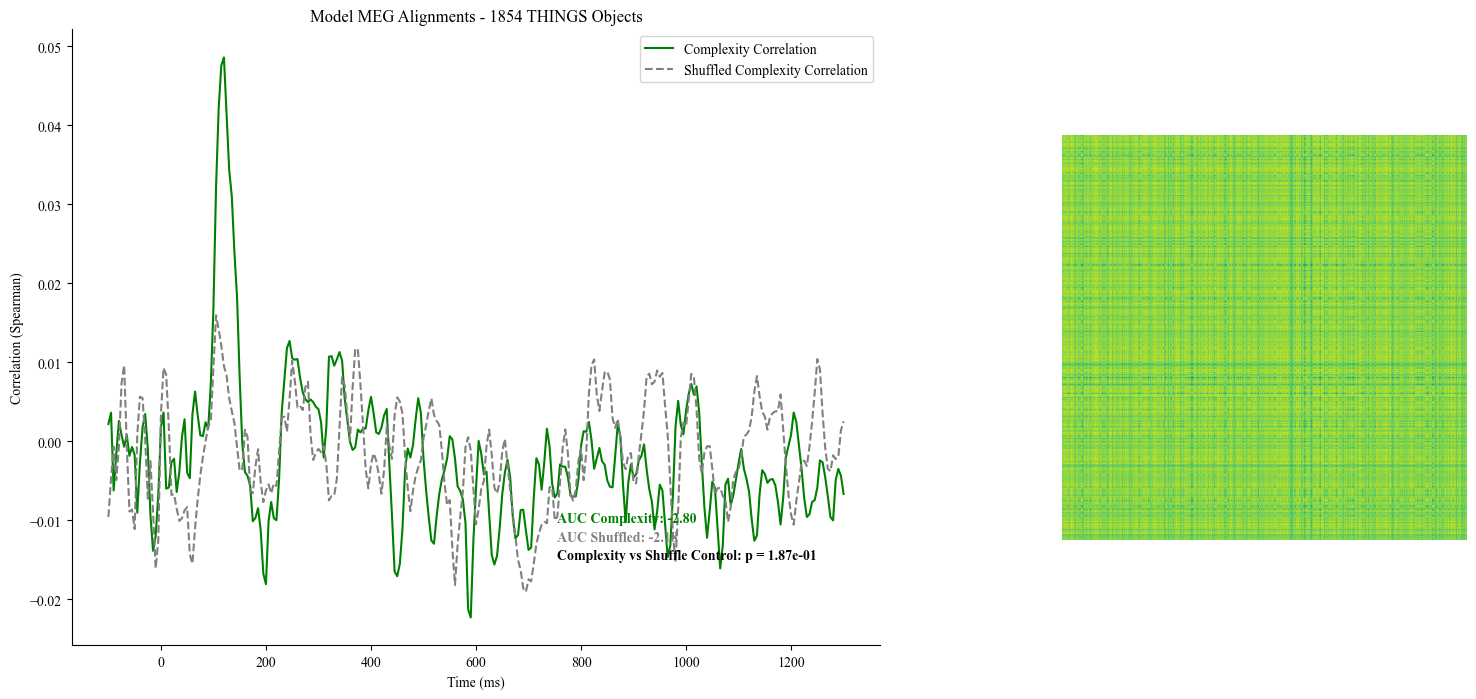

In [67]:
import h5py
import numpy as np
from scipy.stats import spearmanr, wilcoxon
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm import tqdm
import os
from numpy import trapz

plt.rcParams['font.family'] = 'Times New Roman'

def compute_group_mean_rdm(exclude_index):
    group_rdms = np.delete(all_rdms, exclude_index, axis=0)
    mean_rdms = np.mean(group_rdms, axis=0)
    return mean_rdms

def calculate_model_correlation(group_mean_rdms, model_rdm_flat):
    model_correlations = []
    for time_point in range(group_mean_rdms.shape[0]):
        indices = np.triu_indices_from(group_mean_rdms[time_point], k=1)
        group_mean_rdm_flat = group_mean_rdms[time_point][indices]
        corr, _ = spearmanr(model_rdm_flat, group_mean_rdm_flat, nan_policy='omit')
        model_correlations.append(corr)
    return model_correlations

def permute_rdm(rdm):
    permutation = np.random.permutation(rdm.shape[0])
    permuted_rdm = rdm[permutation][:, permutation]
    return permuted_rdm

def calculate_permuted_correlations(model_rdm, group_mean_rdms, num_permutations):
    permuted_correlations = []
    for _ in range(num_permutations):
        permuted_model_rdm = permute_rdm(model_rdm)
        indices = np.triu_indices_from(permuted_model_rdm, k=1)
        permuted_model_rdm_flat = permuted_model_rdm[indices]
        model_correlations = calculate_model_correlation(group_mean_rdms, permuted_model_rdm_flat)
        permuted_correlations.append(model_correlations)
    return np.array(permuted_correlations)

def permutation_testing(args):
    model_rdm, group_mean_rdms, num_permutations = args
    return calculate_permuted_correlations(model_rdm, group_mean_rdms, num_permutations)

def load_dynamic_rdms(dynamic_rdm_dir):
    dynamic_rdms = {}
    for rdm_file in sorted(os.listdir(dynamic_rdm_dir)):
        if rdm_file.endswith('.hdf5'):
            time_ms = int(rdm_file.split('_')[-1][:-7])  # Extract time in ms from filename
            with h5py.File(os.path.join(dynamic_rdm_dir, rdm_file), 'r') as f:
                dynamic_rdms[time_ms] = f['rdm'][:]
    return dynamic_rdms

def fdr_correction(p_values, alpha=0.05):
    p_values_sorted = np.sort(p_values)
    p_values_indices = np.argsort(p_values)
    n = len(p_values)
    fdr_threshold = np.arange(1, n+1) * (alpha / n)
    below_threshold = p_values_sorted <= fdr_threshold
    max_below = np.max(np.where(below_threshold)[0]) if np.any(below_threshold) else -1
    corrected_threshold = p_values_sorted[max_below] if max_below >= 0 else 0
    return p_values <= corrected_threshold

def flatten_upper_triangles(rdms):
    if rdms.ndim == 3:

        # Get the upper triangle indices for one matrix (all matrices have the same shape)
        triu_indices = np.triu_indices_from(rdms[0], k=1)
        
        # Flatten the upper triangles of all matrices
        flattened_rdms = np.array([matrix[triu_indices] for matrix in rdms])

        return flattened_rdms
    elif rdms.ndim == 2:
        triu_indices = np.triu_indices_from(rdms, k=1)
        return rdms[triu_indices]

def calculate_individual_correlation(model_rdms, p_rdms):
    model_correlations = []
    print(model_rdms.shape)
    print(p_rdms.shape)

    for i in range(281):
        model_rdm_flat = flatten_upper_triangles(model_rdms)
        p_rdm_flat = flatten_upper_triangles(p_rdms[i])
        corr, _ = spearmanr(model_rdm_flat, p_rdm_flat, nan_policy='omit')
        model_correlations.append(corr)
    print(model_correlations)

    return model_correlations


if __name__ == '__main__':
    # Ensure the figures directory exists
    figures_dir = './figures'
    if not os.path.exists(figures_dir):
        os.makedirs(figures_dir)

    # Load the .mat file
    meg_rdm = "/home/wallacelab/complexity-final/Optimizations/Neural/MEG/ThingsMEG_RDMs/ThingsMEG_RDM_4P.npy"
    print("loading Things MEG RDM")
    all_rdms = np.load(meg_rdm, allow_pickle=True)

    # Paths for model RDMs
    x_rdm_path = '/home/wallacelab/complexity-final/Optimizations/Neural/output/things_crossval_optimized_hba_rdm.hdf5'

    # Load the models' RDMs
    print("loading Complexity RDMs")
    with h5py.File(x_rdm_path, 'r') as f:
        x_rdm = f['rdm'][:]
        indices = np.triu_indices_from(x_rdm, k=1)
        x_rdm_flat = x_rdm[indices]

    # Create a permuted (shuffled) version of x_rdm
    x_rdm_permuted = permute_rdm(x_rdm)
    x_rdm_permuted_flat = x_rdm_permuted[indices]

    overall_group_mean_rdms = np.mean(all_rdms, axis=0) # Compute group mean RDMs including all subjects
    print("processing Complexity model correlation")
    x_correlations = calculate_model_correlation(overall_group_mean_rdms, x_rdm_flat)

    print("processing Permuted Complexity model correlation")
    x_permuted_correlations = calculate_model_correlation(overall_group_mean_rdms, x_rdm_permuted_flat)
    

    # Time points for plotting
    time_points = np.linspace(-100, 1300, 281)

    # Perform signed rank Wilcoxon test for each time point
    print("performing Wilcoxon signed rank test")
    p = wilcoxon(x_correlations, x_permuted_correlations).pvalue

    print("plotting")
    # Plotting
    # Create a figure with a grid layout
    fig = plt.figure(figsize=(18, 8))
    plt.rcParams['font.family'] = 'Times New Roman'  # Set font to Times New Roman
    gs = fig.add_gridspec(1, 2, width_ratios=[2, 1], wspace=0.3)

    # Plot 1: Correlation plots
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(time_points, x_correlations, label='Complexity Correlation', color='green')
    ax1.plot(time_points, x_permuted_correlations, label='Shuffled Complexity Correlation', color='grey', linestyle='--')

    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Correlation (Spearman)')
    ax1.set_title('Model MEG Alignments - 1854 THINGS Objects')
    ax1.legend()

    # Remove top and right frame
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Calculate AUC for each correlation curve
    auc_x = trapz(x_correlations, dx=np.diff(time_points)[0])
    auc_x_permuted = trapz(x_permuted_correlations, dx=np.diff(time_points)[0])

    # Annotate AUC values
    plt.annotate(f'AUC Complexity: {auc_x:.2f}', xy=(0.6, 0.20), xycoords='axes fraction', color='green', size=10, weight='bold')
    plt.annotate(f'AUC Shuffled: {auc_x_permuted:.2f}', xy=(0.6, 0.17), xycoords='axes fraction', color='grey', size=10, weight='bold')
    plt.annotate(f'Complexity vs Shuffle Control: p = {p:.2e}', xy=(0.6, 0.14), xycoords='axes fraction', color='black', size=10, weight='bold')

    # Plot 2: RDM plot
    ax2 = fig.add_subplot(gs[0, 1])
    fig.patch.set_facecolor('none')  # Set the figure facecolor to none
    ax2.set_facecolor('none')  # Set the axes facecolor to none

    im = ax2.imshow(rdm, cmap='viridis_r')  # Display the image

    ax2.axis('off')  # Remove the x and y axis labels

    plt.show()


loading Things MEG RDM
loading Complexity RDMs
processing Complexity model correlation
processing Permuted Complexity model correlation
performing Wilcoxon signed rank test
plotting


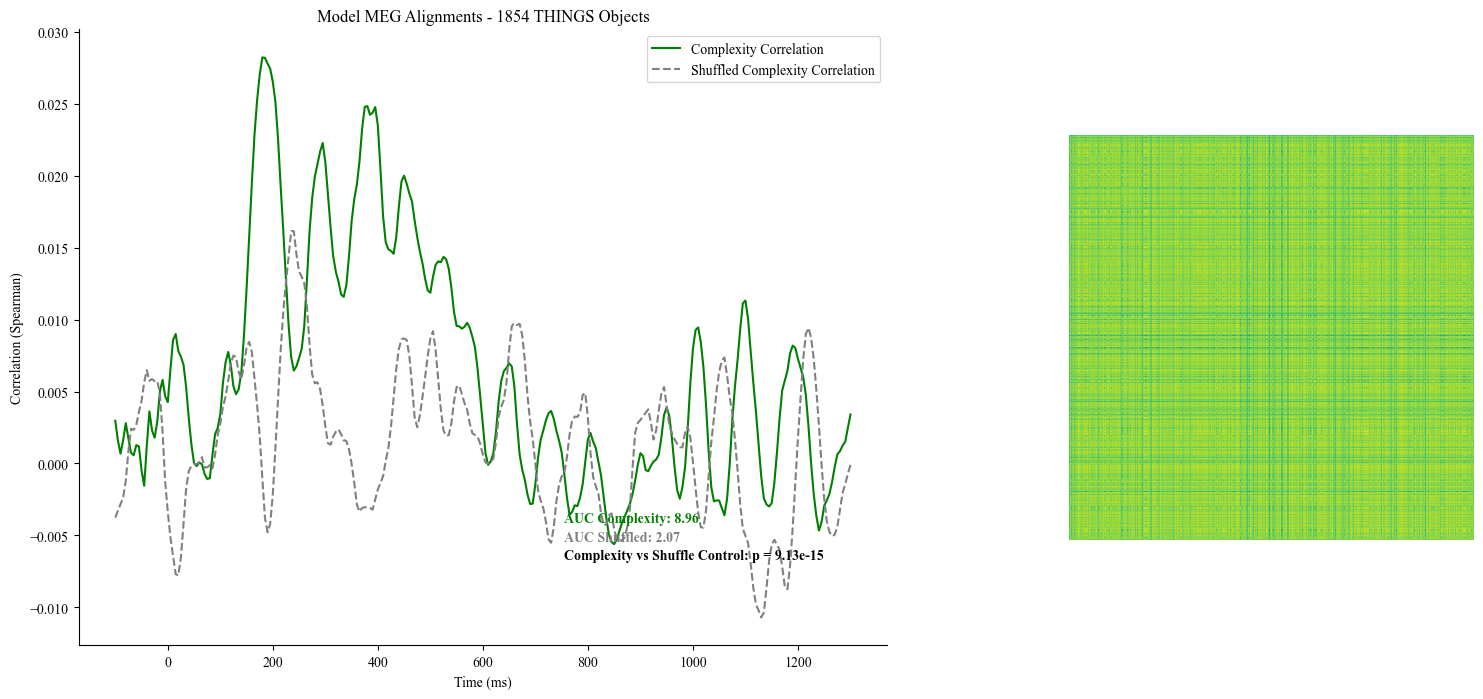

In [12]:
import h5py
import numpy as np
from scipy.stats import spearmanr, wilcoxon
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm import tqdm
import os
from numpy import trapz

plt.rcParams['font.family'] = 'Times New Roman'

def compute_group_mean_rdm(exclude_index):
    group_rdms = np.delete(all_rdms, exclude_index, axis=0)
    mean_rdms = np.mean(group_rdms, axis=0)
    return mean_rdms

# def calculate_model_correlation(group_mean_rdms, model_rdm_flat):
#     model_correlations = []
#     for time_point in range(group_mean_rdms.shape[0]):
#         indices = np.triu_indices_from(group_mean_rdms[time_point], k=1)
#         group_mean_rdm_flat = group_mean_rdms[time_point][indices]
#         corr, _ = spearmanr(model_rdm_flat, group_mean_rdm_flat, nan_policy='omit')
#         model_correlations.append(corr)
#     return model_correlations
def calculate_model_correlation(group_mean_rdms, model_rdm_flat):
    model_correlations = []
    n_timepoints = group_mean_rdms.shape[0]

    for time_point in range(n_timepoints):
        correlations = []
        for t in range(max(0, time_point - 3), min(n_timepoints, time_point + 4)):
            indices = np.triu_indices_from(group_mean_rdms[t], k=1)
            group_mean_rdm_flat = group_mean_rdms[t][indices]
            corr, _ = spearmanr(model_rdm_flat, group_mean_rdm_flat, nan_policy='omit')
            correlations.append(corr)
        mean_corr = np.mean(correlations) if correlations else np.nan
        model_correlations.append(mean_corr)

    return model_correlations
def permute_rdm(rdm):
    permutation = np.random.permutation(rdm.shape[0])
    permuted_rdm = rdm[permutation][:, permutation]
    return permuted_rdm

def calculate_permuted_correlations(model_rdm, group_mean_rdms, num_permutations):
    permuted_correlations = []
    for _ in range(num_permutations):
        permuted_model_rdm = permute_rdm(model_rdm)
        indices = np.triu_indices_from(permuted_model_rdm, k=1)
        permuted_model_rdm_flat = permuted_model_rdm[indices]
        model_correlations = calculate_model_correlation(group_mean_rdms, permuted_model_rdm_flat)
        permuted_correlations.append(model_correlations)
    return np.array(permuted_correlations)

def permutation_testing(args):
    model_rdm, group_mean_rdms, num_permutations = args
    return calculate_permuted_correlations(model_rdm, group_mean_rdms, num_permutations)

def load_dynamic_rdms(dynamic_rdm_dir):
    dynamic_rdms = {}
    for rdm_file in sorted(os.listdir(dynamic_rdm_dir)):
        if rdm_file.endswith('.hdf5'):
            time_ms = int(rdm_file.split('_')[-1][:-7])  # Extract time in ms from filename
            with h5py.File(os.path.join(dynamic_rdm_dir, rdm_file), 'r') as f:
                dynamic_rdms[time_ms] = f['rdm'][:]
    return dynamic_rdms

def fdr_correction(p_values, alpha=0.05):
    p_values_sorted = np.sort(p_values)
    p_values_indices = np.argsort(p_values)
    n = len(p_values)
    fdr_threshold = np.arange(1, n+1) * (alpha / n)
    below_threshold = p_values_sorted <= fdr_threshold
    max_below = np.max(np.where(below_threshold)[0]) if np.any(below_threshold) else -1
    corrected_threshold = p_values_sorted[max_below] if max_below >= 0 else 0
    return p_values <= corrected_threshold

def flatten_upper_triangles(rdms):
    if rdms.ndim == 3:

        # Get the upper triangle indices for one matrix (all matrices have the same shape)
        triu_indices = np.triu_indices_from(rdms[0], k=1)
        
        # Flatten the upper triangles of all matrices
        flattened_rdms = np.array([matrix[triu_indices] for matrix in rdms])

        return flattened_rdms
    elif rdms.ndim == 2:
        triu_indices = np.triu_indices_from(rdms, k=1)
        return rdms[triu_indices]

def calculate_individual_correlation(model_rdms, p_rdms):
    model_correlations = []
    print(model_rdms.shape)
    print(p_rdms.shape)

    for i in range(281):
        model_rdm_flat = flatten_upper_triangles(model_rdms)
        p_rdm_flat = flatten_upper_triangles(p_rdms[i])
        corr, _ = spearmanr(model_rdm_flat, p_rdm_flat, nan_policy='omit')
        model_correlations.append(corr)
    print(model_correlations)

    return model_correlations


if __name__ == '__main__':
    # Ensure the figures directory exists
    figures_dir = './figures'
    if not os.path.exists(figures_dir):
        os.makedirs(figures_dir)

    # Load the .mat file
    meg_rdm = "./Data/ThingsMEG_RDMs/THingsMEG_RDM_4P.npy"
    print("loading Things MEG RDM")
    all_rdms = np.load(meg_rdm, allow_pickle=True)

    # Paths for model RDMs
    x_rdm_path = hdf5_file

    # Load the models' RDMs
    print("loading Complexity RDMs")
    with h5py.File(x_rdm_path, 'r') as f:
        x_rdm = f['rdm'][:]
        indices = np.triu_indices_from(x_rdm, k=1)
        x_rdm_flat = x_rdm[indices]

    # Create a permuted (shuffled) version of x_rdm
    x_rdm_permuted = permute_rdm(x_rdm)
    x_rdm_permuted_flat = x_rdm_permuted[indices]

    overall_group_mean_rdms = np.mean(all_rdms, axis=0) # Compute group mean RDMs including all subjects
    print("processing Complexity model correlation")
    x_correlations = calculate_model_correlation(overall_group_mean_rdms, x_rdm_flat)

    print("processing Permuted Complexity model correlation")
    x_permuted_correlations = calculate_model_correlation(overall_group_mean_rdms, x_rdm_permuted_flat)
    

    # Time points for plotting
    time_points = np.linspace(-100, 1300, 281)

    # Perform signed rank Wilcoxon test for each time point
    print("performing Wilcoxon signed rank test")
    p = wilcoxon(x_correlations, x_permuted_correlations).pvalue

    print("plotting")
    # Plotting
    # Create a figure with a grid layout
    fig = plt.figure(figsize=(18, 8))
    plt.rcParams['font.family'] = 'Times New Roman'  # Set font to Times New Roman
    gs = fig.add_gridspec(1, 2, width_ratios=[2, 1], wspace=0.3)

    # Plot 1: Correlation plots
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(time_points, x_correlations, label='Complexity Correlation', color='green')
    ax1.plot(time_points, x_permuted_correlations, label='Shuffled Complexity Correlation', color='grey', linestyle='--')

    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Correlation (Spearman)')
    ax1.set_title('Model MEG Alignments - 1854 THINGS Objects')
    ax1.legend()

    # Remove top and right frame
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Calculate AUC for each correlation curve
    auc_x = trapz(x_correlations, dx=np.diff(time_points)[0])
    auc_x_permuted = trapz(x_permuted_correlations, dx=np.diff(time_points)[0])

    # Annotate AUC values
    plt.annotate(f'AUC Complexity: {auc_x:.2f}', xy=(0.6, 0.20), xycoords='axes fraction', color='green', size=10, weight='bold')
    plt.annotate(f'AUC Shuffled: {auc_x_permuted:.2f}', xy=(0.6, 0.17), xycoords='axes fraction', color='grey', size=10, weight='bold')
    plt.annotate(f'Complexity vs Shuffle Control: p = {p:.2e}', xy=(0.6, 0.14), xycoords='axes fraction', color='black', size=10, weight='bold')

    # Plot 2: RDM plot
    ax2 = fig.add_subplot(gs[0, 1])
    fig.patch.set_facecolor('none')  # Set the figure facecolor to none
    ax2.set_facecolor('none')  # Set the axes facecolor to none

    im = ax2.imshow(rdm, cmap='viridis_r')  # Display the image

    ax2.axis('off')  # Remove the x and y axis labels

    plt.show()


loading Things MEG RDM
loading Complexity RDMs
processing Complexity model correlation
processing Permuted Complexity model correlation
performing Wilcoxon signed rank test
plotting


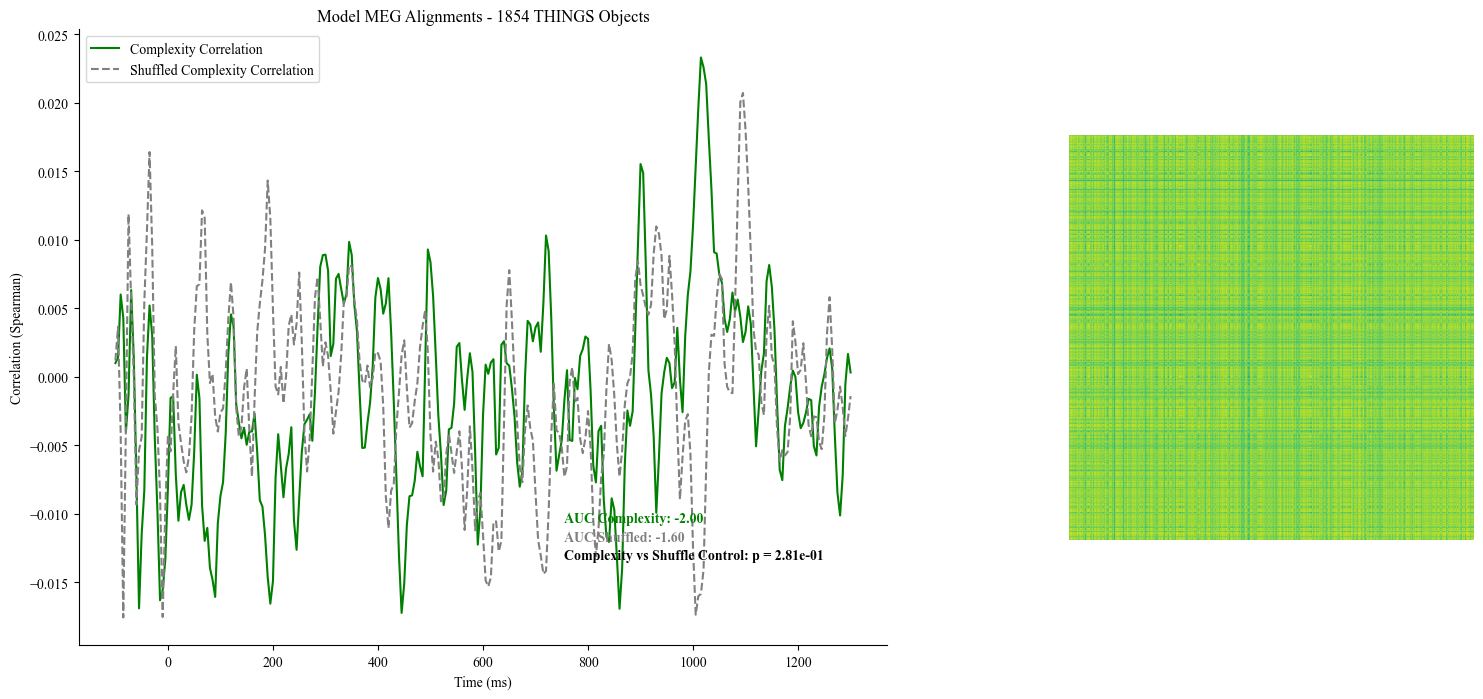

In [76]:
import h5py
import numpy as np
from scipy.stats import spearmanr, wilcoxon
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm import tqdm
import os
from numpy import trapz

plt.rcParams['font.family'] = 'Times New Roman'

def compute_group_mean_rdm(exclude_index):
    group_rdms = np.delete(all_rdms, exclude_index, axis=0)
    mean_rdms = np.mean(group_rdms, axis=0)
    return mean_rdms

def calculate_model_correlation(group_mean_rdms, model_rdm_flat):
    model_correlations = []
    for time_point in range(group_mean_rdms.shape[0]):
        indices = np.triu_indices_from(group_mean_rdms[time_point], k=1)
        group_mean_rdm_flat = group_mean_rdms[time_point][indices]
        corr, _ = spearmanr(model_rdm_flat, group_mean_rdm_flat, nan_policy='omit')
        model_correlations.append(corr)
    return model_correlations

def permute_rdm(rdm):
    permutation = np.random.permutation(rdm.shape[0])
    permuted_rdm = rdm[permutation][:, permutation]
    return permuted_rdm

def calculate_permuted_correlations(model_rdm, group_mean_rdms, num_permutations):
    permuted_correlations = []
    for _ in range(num_permutations):
        permuted_model_rdm = permute_rdm(model_rdm)
        indices = np.triu_indices_from(permuted_model_rdm, k=1)
        permuted_model_rdm_flat = permuted_model_rdm[indices]
        model_correlations = calculate_model_correlation(group_mean_rdms, permuted_model_rdm_flat)
        permuted_correlations.append(model_correlations)
    return np.array(permuted_correlations)

def permutation_testing(args):
    model_rdm, group_mean_rdms, num_permutations = args
    return calculate_permuted_correlations(model_rdm, group_mean_rdms, num_permutations)

def load_dynamic_rdms(dynamic_rdm_dir):
    dynamic_rdms = {}
    for rdm_file in sorted(os.listdir(dynamic_rdm_dir)):
        if rdm_file.endswith('.hdf5'):
            time_ms = int(rdm_file.split('_')[-1][:-7])  # Extract time in ms from filename
            with h5py.File(os.path.join(dynamic_rdm_dir, rdm_file), 'r') as f:
                dynamic_rdms[time_ms] = f['rdm'][:]
    return dynamic_rdms

def fdr_correction(p_values, alpha=0.05):
    p_values_sorted = np.sort(p_values)
    p_values_indices = np.argsort(p_values)
    n = len(p_values)
    fdr_threshold = np.arange(1, n+1) * (alpha / n)
    below_threshold = p_values_sorted <= fdr_threshold
    max_below = np.max(np.where(below_threshold)[0]) if np.any(below_threshold) else -1
    corrected_threshold = p_values_sorted[max_below] if max_below >= 0 else 0
    return p_values <= corrected_threshold

def flatten_upper_triangles(rdms):
    if rdms.ndim == 3:

        # Get the upper triangle indices for one matrix (all matrices have the same shape)
        triu_indices = np.triu_indices_from(rdms[0], k=1)
        
        # Flatten the upper triangles of all matrices
        flattened_rdms = np.array([matrix[triu_indices] for matrix in rdms])

        return flattened_rdms
    elif rdms.ndim == 2:
        triu_indices = np.triu_indices_from(rdms, k=1)
        return rdms[triu_indices]

def calculate_individual_correlation(model_rdms, p_rdms):
    model_correlations = []
    print(model_rdms.shape)
    print(p_rdms.shape)

    for i in range(281):
        model_rdm_flat = flatten_upper_triangles(model_rdms)
        p_rdm_flat = flatten_upper_triangles(p_rdms[i])
        corr, _ = spearmanr(model_rdm_flat, p_rdm_flat, nan_policy='omit')
        model_correlations.append(corr)
    print(model_correlations)

    return model_correlations


if __name__ == '__main__':
    # Ensure the figures directory exists
    figures_dir = './figures'
    if not os.path.exists(figures_dir):
        os.makedirs(figures_dir)

    # Load the .mat file
    meg_rdm = "/home/wallacelab/complexity-final/Optimizations/Neural/MEG/ThingsMEG_RDMs/ThingsMEG_RDM_4P.npy"
    print("loading Things MEG RDM")
    all_rdms = np.load(meg_rdm, allow_pickle=True)

    # Paths for model RDMs
    x_rdm_path = '/home/wallacelab/complexity-final/Optimizations/Neural/output/things_crossval_scaled_optimized_hba_rdm.hdf5'

    # Load the models' RDMs
    print("loading Complexity RDMs")
    with h5py.File(x_rdm_path, 'r') as f:
        x_rdm = f['rdm'][:]
        indices = np.triu_indices_from(x_rdm, k=1)
        x_rdm_flat = x_rdm[indices]

    # Create a permuted (shuffled) version of x_rdm
    x_rdm_permuted = permute_rdm(x_rdm)
    x_rdm_permuted_flat = x_rdm_permuted[indices]

    overall_group_mean_rdms = np.mean(all_rdms, axis=0) # Compute group mean RDMs including all subjects
    print("processing Complexity model correlation")
    x_correlations = calculate_model_correlation(overall_group_mean_rdms, x_rdm_flat)

    print("processing Permuted Complexity model correlation")
    x_permuted_correlations = calculate_model_correlation(overall_group_mean_rdms, x_rdm_permuted_flat)
    

    # Time points for plotting
    time_points = np.linspace(-100, 1300, 281)

    # Perform signed rank Wilcoxon test for each time point
    print("performing Wilcoxon signed rank test")
    p = wilcoxon(x_correlations, x_permuted_correlations).pvalue

    print("plotting")
    # Plotting
    # Create a figure with a grid layout
    fig = plt.figure(figsize=(18, 8))
    plt.rcParams['font.family'] = 'Times New Roman'  # Set font to Times New Roman
    gs = fig.add_gridspec(1, 2, width_ratios=[2, 1], wspace=0.3)

    # Plot 1: Correlation plots
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(time_points, x_correlations, label='Complexity Correlation', color='green')
    ax1.plot(time_points, x_permuted_correlations, label='Shuffled Complexity Correlation', color='grey', linestyle='--')

    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Correlation (Spearman)')
    ax1.set_title('Model MEG Alignments - 1854 THINGS Objects')
    ax1.legend()

    # Remove top and right frame
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Calculate AUC for each correlation curve
    auc_x = trapz(x_correlations, dx=np.diff(time_points)[0])
    auc_x_permuted = trapz(x_permuted_correlations, dx=np.diff(time_points)[0])

    # Annotate AUC values
    plt.annotate(f'AUC Complexity: {auc_x:.2f}', xy=(0.6, 0.20), xycoords='axes fraction', color='green', size=10, weight='bold')
    plt.annotate(f'AUC Shuffled: {auc_x_permuted:.2f}', xy=(0.6, 0.17), xycoords='axes fraction', color='grey', size=10, weight='bold')
    plt.annotate(f'Complexity vs Shuffle Control: p = {p:.2e}', xy=(0.6, 0.14), xycoords='axes fraction', color='black', size=10, weight='bold')

    # Plot 2: RDM plot
    ax2 = fig.add_subplot(gs[0, 1])
    fig.patch.set_facecolor('none')  # Set the figure facecolor to none
    ax2.set_facecolor('none')  # Set the axes facecolor to none

    im = ax2.imshow(rdm, cmap='viridis_r')  # Display the image

    ax2.axis('off')  # Remove the x and y axis labels

    plt.show()